# Simple inference example with CroCo-Stereo or CroCo-Flow

In [1]:
# Copyright (C) 2022-present Naver Corporation. All rights reserved.
# Licensed under CC BY-NC-SA 4.0 (non-commercial use only).

First download the model(s) of your choice by running
```
bash stereoflow/download_model.sh crocostereo.pth
bash stereoflow/download_model.sh crocoflow.pth
```

In [2]:
import torch
use_gpu = torch.cuda.is_available() and torch.cuda.device_count()>0
device = torch.device('cuda:0' if use_gpu else 'cpu')
import matplotlib.pylab as plt

In [4]:
from stereoflow.test import _load_model_and_criterion
from stereoflow.engine import tiled_pred
from stereoflow.datasets_stereo import img_to_tensor, vis_disparity
from stereoflow.datasets_flow import flowToColor
tile_overlap=0.7 # recommended value, higher value can be slightly better but slower

### CroCo-Stereo example

In [7]:
from PIL import Image
import numpy as np

image1 = np.asarray(Image.open('images/000000_10.png'))
image2 = np.asarray(Image.open('images/000000_11.png'))

In [8]:
model, _, cropsize, with_conf, task, tile_conf_mode = _load_model_and_criterion('stereoflow_models/crocostereo.pth', None, device)


loading model from stereoflow_models/crocostereo.pth
head: PixelwiseTaskWithDPT()
croco_args: {'enc_embed_dim': 1024, 'enc_depth': 24, 'enc_num_heads': 16, 'dec_embed_dim': 768, 'dec_num_heads': 12, 'dec_depth': 12, 'img_size': (352, 704), 'pos_embed': 'RoPE100'}
  PixelwiseTaskWithDPT: automatically setting hook_idxs=[23, 27, 31, 35]


In [9]:
im1 = img_to_tensor(image1).to(device).unsqueeze(0)
im2 = img_to_tensor(image2).to(device).unsqueeze(0)
with torch.inference_mode():
    pred, _, _ = tiled_pred(model, None, im1, im2, None, conf_mode=tile_conf_mode, overlap=tile_overlap, crop=cropsize, with_conf=with_conf, return_time=False)
pred = pred.squeeze(0).squeeze(0).cpu().numpy()

(-0.5, 1241.5, 374.5, -0.5)

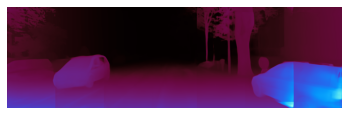

In [10]:
plt.imshow(vis_disparity(pred))
plt.axis('off')

### CroCo-Flow example

In [11]:
image1 = np.asarray(Image.open('images/000000_10.png'))
image2 = np.asarray(Image.open('images/000000_11.png'))

In [12]:
model, _, cropsize, with_conf, task, tile_conf_mode = _load_model_and_criterion('stereoflow_models/crocoflow.pth', None, device)


loading model from stereoflow_models/crocoflow.pth
head: PixelwiseTaskWithDPT()
croco_args: {'enc_embed_dim': 1024, 'enc_depth': 24, 'enc_num_heads': 16, 'dec_embed_dim': 768, 'dec_num_heads': 12, 'dec_depth': 12, 'img_size': (320, 384), 'pos_embed': 'RoPE100'}
  PixelwiseTaskWithDPT: automatically setting hook_idxs=[23, 27, 31, 35]


In [13]:
im1 = img_to_tensor(image1).to(device).unsqueeze(0)
im2 = img_to_tensor(image2).to(device).unsqueeze(0)
with torch.inference_mode():
    pred, _, _ = tiled_pred(model, None, im1, im2, None, conf_mode=tile_conf_mode, overlap=tile_overlap, crop=cropsize, with_conf=with_conf, return_time=False)
pred = pred.squeeze(0).permute(1,2,0).cpu().numpy()

(-0.5, 1241.5, 374.5, -0.5)

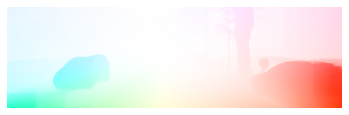

In [14]:
plt.imshow(flowToColor(pred))
plt.axis('off')